# Projet 3 : Concevez une application au service de la santé publique

L'agence "Santé publique France" a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation. Vous souhaitez y participer et proposer une idée d’application.

L'agence Santé publique France Les données Extrait de l’appel à projets :

Le jeu de données Open Food Facts est disponible sur le site officiel (ou disponible à ce lien en téléchargement). Les variables sont définies à cette adresse.

Les champs sont séparés en quatre sections :

Les informations générales sur la fiche du produit : nom, date de modification, etc. Un ensemble de tags : catégorie du produit, localisation, origine, etc. Les ingrédients composant les produits et leurs additifs éventuels. Des informations nutritionnelles : quantité en grammes d’un nutriment pour 100 grammes du produit. Votre mission Après avoir lu l’appel à projets, voici les différentes étapes que vous avez identifiées :

1) Traiter le jeu de données, en :

Réfléchissant à une idée d’application. Repérant des variables pertinentes pour les traitements à venir, et nécessaires pour votre idée d’application. Nettoyant les données en : mettant en évidence les éventuelles valeurs manquantes, avec au moins 3 méthodes de traitement adaptées aux variables concernées, identifiant et en quantifiant les éventuelles valeurs aberrantes de chaque variable. Automatisant ces traitements pour éviter de répéter ces opérations Le programme doit fonctionner si la base de données est légèrement modifiée (ajout d’entrées, par exemple).

2) Tout au long de l’analyse, produire des visualisations afin de mieux comprendre les données. Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement.

L’appel à projets spécifie que l’analyse doit être simple à comprendre pour un public néophyte. Soyez donc attentif à la lisibilité : taille des textes, choix des couleurs, netteté suffisante, et variez les graphiques (boxplots, histogrammes, diagrammes circulaires, nuages de points…) pour illustrer au mieux votre propos.

3) Confirmer ou infirmer les hypothèses à l’aide d’une analyse multivariée. Effectuer les tests statistiques appropriés pour vérifier la significativité des résultats.

4) Justifier votre idée d’application. Identifier des arguments justifiant la faisabilité (ou non) de l’application à partir des données Open Food Facts.

5) Rédiger un rapport d’exploration et pitcher votre idée durant la soutenance du projet.

Livrables Un notebook du nettoyage des données (non cleané, pour comprendre votre démarche). Un notebook d’exploration comportant une analyse univariée, multivariée, une réduction dimensionnelle, ainsi que les différentes questions de recherches associées (non cleané, pour comprendre votre démarche). Une présentation, à utiliser en support pour la soutenance, comprenant : La présentation de votre idée d’application. Les opérations de nettoyage effectuées. La description et l'analyse univariée des différentes variables importantes avec les visualisations associées. L’analyse multivariée et les résultats statistiques associés, en lien avec votre idée d’application. 3 observations solidement étayées (graphes et/ou tests statistiques à l’appui au besoin) évaluant la pertinence et la faisabilité de votre application. La synthèse des différentes conclusions sur la faisabilité de votre projet.

# Sommaire

# I. Importation des données 

### a. Les bibliothèques 

### b. La base de données




# II. Exploration de la base de données

 
 


# III. Nettoyage des données

### a. Nettoyage par moyenne des valeurs manquantes

### b. Nettoyage par colonnes

### c. Nettoyage par lignes

### d. Analyse des valeurs aberrantes

### e. Remplacement des valeurs manquantes

### f. Imputation des valeurs manquantes


# 

## I. Importation des données

### a. Les bibliothèques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings

# Bibliothèques pour l'imputation
from sklearn.preprocessing import OrdinalEncoder
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

### b. La base de données

In [2]:
# utilisation du séparateur '\t' pour lecture du fichier

data = pd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t')

C:\Users\gregm\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
#Modification des affichages de colonnes, lignes et largeurs de colonnes pour avoir un maximum d'information

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)

## II. Exploration de la base de données

In [4]:
# Création boucle for

database = [data]

for i in database:
    print ('-------------------------------------------------------------------------------------------------------')
    print ('----------------------------------------')
    print (i.dtypes)
    print ('----------------------------------------')
    print ('Nombre de lignes et de colonnes', i.shape)
    print ('----------------------------------------')
    print(i.columns)
    print ('----------------------------------------')
    print(i.info())
    print ('----------------------------------------')
    print(i.head(5))

-------------------------------------------------------------------------------------------------------
----------------------------------------
code                                           object
url                                            object
creator                                        object
created_t                                      object
created_datetime                               object
last_modified_t                                object
last_modified_datetime                         object
product_name                                   object
generic_name                                   object
quantity                                       object
packaging                                      object
packaging_tags                                 object
brands                                         object
brands_tags                                    object
categories                                     object
categories_tags                              

float64    106
object      56
dtype: int64


Text(0.5, 1.0, 'Analyse de la nature des colonnes du dataset')

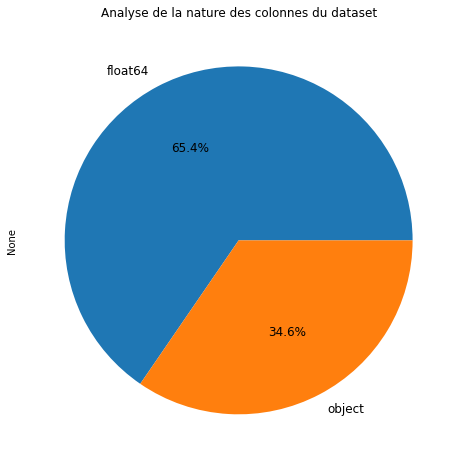

In [5]:
# Graphique de représentation du type de variables

print (data.dtypes.value_counts())

plt.figure(figsize = (10,8))
data.dtypes.value_counts().plot(kind = 'pie',  normalize = True, autopct='%1.1f%%', fontsize = 12)
plt.title ('Analyse de la nature des colonnes du dataset')


Dans cette première partie, nous avons procédé à une analyse de notre dataset.

Nous constatons que le fichier contient 320772 lignes et 162 colonnes.
Pour les colonnes, nous avons 106 colonnes numériques (65,4%) et 56 colonnes objets (34,6%).

En regardant le contenu de notre fichier, nous pouvons remarquer que ce dernier semble contenir des données relatives à l'alimentation, c'est à dire les indicateurs alimentaires pour l'ensemble d'un panel de produits.

Nous allons ici regarder les valeurs manquantes dans ce fichier.


In [6]:
# Analyse du taux des valeurs nulles

valeurs_nulles = data.isnull().mean()*100
valeurs_nulles.sort_values(ascending = False)

water-hardness_100g                           100.000000
no_nutriments                                 100.000000
ingredients_that_may_be_from_palm_oil         100.000000
nutrition_grade_uk                            100.000000
nervonic-acid_100g                            100.000000
erucic-acid_100g                              100.000000
mead-acid_100g                                100.000000
elaidic-acid_100g                             100.000000
butyric-acid_100g                             100.000000
caproic-acid_100g                             100.000000
ingredients_from_palm_oil                     100.000000
lignoceric-acid_100g                          100.000000
cerotic-acid_100g                             100.000000
melissic-acid_100g                            100.000000
chlorophyl_100g                               100.000000
glycemic-index_100g                           100.000000
myristic-acid_100g                             99.999688
palmitic-acid_100g             

<AxesSubplot:>

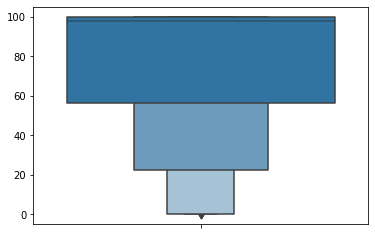

In [7]:
sns.boxenplot(y =valeurs_nulles)

In [8]:
#Pourcentage de données manquantes:

taux=round(100*(data.isnull().sum().sum())/(len(data.axes[1])*len(data.axes[0])))
print('Le taux de données manquantes est de :',str(taux),'%.')

Le taux de données manquantes est de : 76 %.


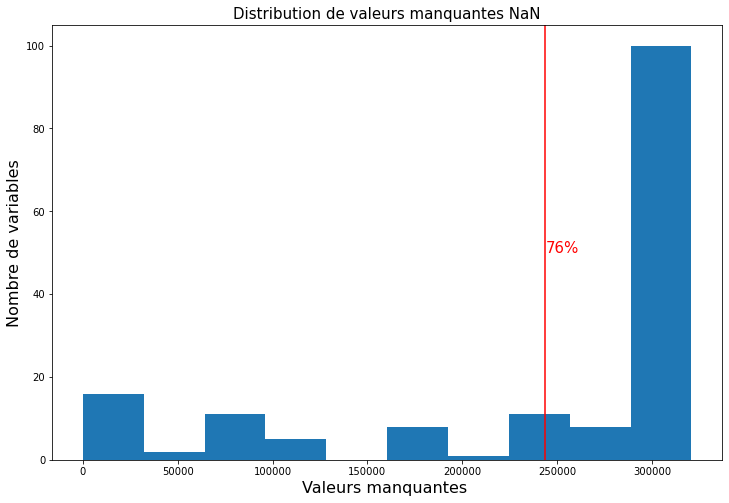

In [9]:
#la distribution des valeurs manquantes :

data.isnull().sum().sort_values().plot(kind='hist', figsize=(12,8))
plt.title('Distribution de valeurs manquantes NaN', size = 15)
plt.xlabel('Valeurs manquantes ',fontsize = 16)
plt.ylabel('Nombre de variables',fontsize = 16)
plt.axvline(x=data.shape[0]*0.76,color='red',linestyle='-') 
plt.text(data.shape[0]*0.76, 50, '76%', color = 'red', size = 15)

plt.show()

Quand nous analysons les valeurs manquantes, il est important de signaler que nous avons un grand nombre de colonnes totalement vides ou avec très peu de données présentes.

Nous pouvons constater que la moyenne de valeurs manquantes est de 76%.

Nous allons ici démarrer notre démarrage du nettoyage de ce fichier.

##  III. Nettoyage des données

### a. Nettoyage par moyenne des valeurs manquantes

In [10]:
# Suppression des colonnes avec colonnes ayant 76% de valeurs nulles

data_nettoye = data.dropna(axis=1,thresh=len(data)*(1-taux/100),how=all)
data_nettoye.shape

(320772, 52)

In [11]:
percent2=round(100*(data_nettoye.isnull().sum().sum())/(len(data_nettoye.axes[1])*len(data_nettoye.axes[0])))
print('Le taux de données manquantes est de :',str(percent2),'%.')

Le taux de données manquantes est de : 32 %.


A travers ce premier nettoyage, nous pouvons constater que le nombre de colonnes est passé de 162 à 52 colonnes.Nous sommes ici passés d'un taux de 76 % de valeurs manquantes à 32%.


code                                        0.007170
url                                         0.007170
creator                                     0.000623
created_t                                   0.000935
created_datetime                            0.002806
last_modified_t                             0.000000
last_modified_datetime                      0.000000
product_name                                5.537266
quantity                                   67.322896
packaging                                  75.384385
packaging_tags                             75.384073
brands                                      8.857382
brands_tags                                 8.859876
categories                                 73.685359
categories_tags                            73.691906
categories_fr                              73.685047
countries                                   0.087289
countries_tags                              0.087289
countries_fr                                0.

<AxesSubplot:>

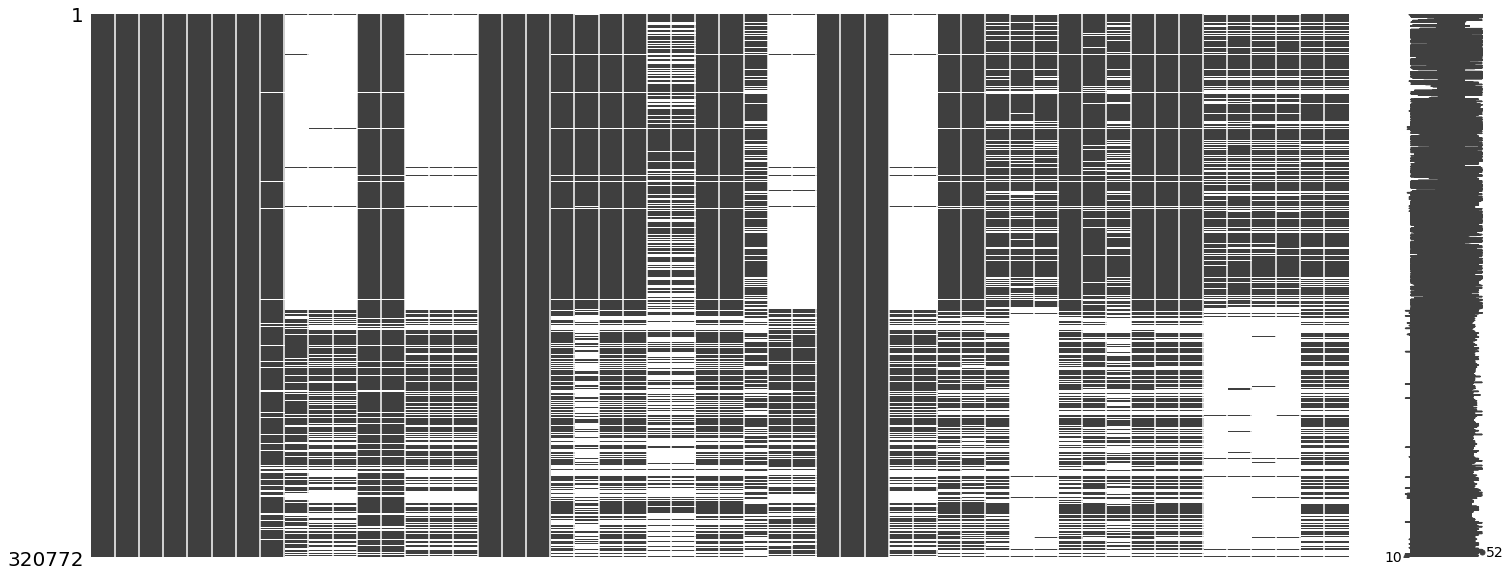

In [12]:
# Visualisation du taux de valeurs nulles

print(data_nettoye.isnull().mean()*100)

msno.matrix(data_nettoye)

Nous avons ici procédé à une première étape de nettoyage à travers un fort nettoyage des colonnes peu exploitables. Nous allons ici continuer sur le traitement des colonnes en supprimant les variables semblant présenter un doublon.

## b. Nettoyage par colonnes

In [13]:
# Suppression des colonnes 'doublons'

data_nettoye = data_nettoye.drop(columns = ['last_modified_t', 'last_modified_datetime',
                                            'packaging_tags', 'brands_tags', 'countries',
                                            'countries_tags', 'additives_tags', 
                                            'ingredients_that_may_be_from_palm_oil_n',
                                            'main_category', 'nutrition-score-uk_100g', 'states', 'states_tags'])


In [14]:
print(data_nettoye.shape)
print(data_nettoye.isnull().mean()*100)

(320772, 40)
code                            0.007170
url                             0.007170
creator                         0.000623
created_t                       0.000935
created_datetime                0.002806
product_name                    5.537266
quantity                       67.322896
packaging                      75.384385
brands                          8.857382
categories                     73.685359
categories_tags                73.691906
categories_fr                  73.685047
countries_fr                    0.087289
ingredients_text               22.386617
serving_size                   34.118003
additives_n                    22.393787
additives                      22.404387
additives_fr                   51.778834
ingredients_from_palm_oil_n    22.393787
nutrition_grade_fr             31.038245
pnns_groups_1                  71.471014
pnns_groups_2                  70.542628
states_fr                       0.014340
main_category_fr               73.699076
ene

Nous avons ici procédé à la suppression des colonnes non utiles. Nous sommes ainsi passés de 52 à 40 colonnes dans notre Dataset.

A partir des données que nous avons ici, l'orientation de notre projet est de s'intéresser aux valeurs du Nutri Score non calculés.
En effet, notre base de données présentent déjà des données pour l'analyse du nutri score.
L'objectif de notre application pourrait être de créer un système qui permet d'obtenir un score de nutrition en fonction des principaux critères.

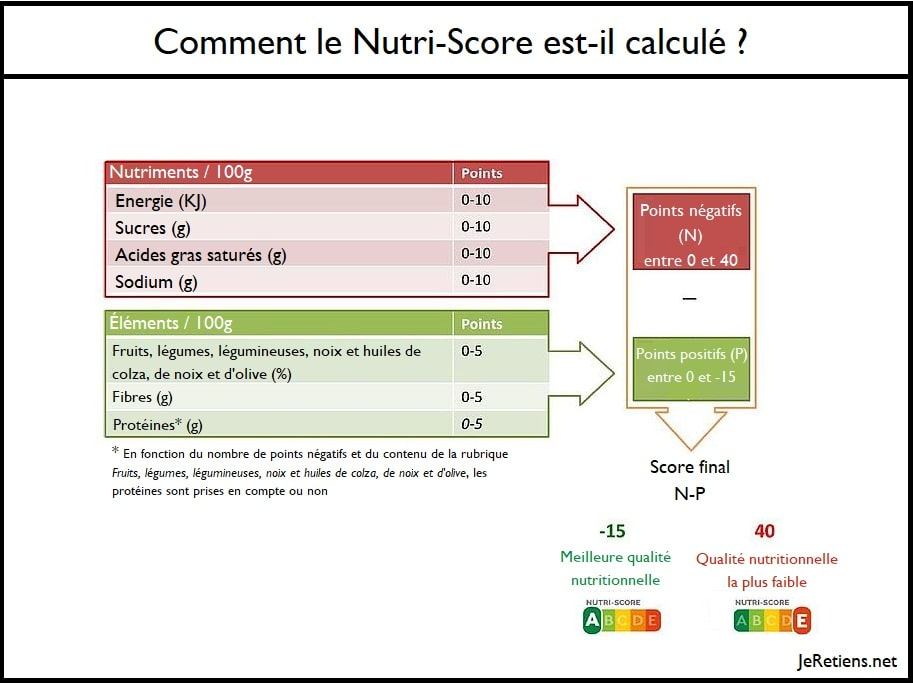

Nous pouvons ici constater que le Nutri Score est calculé à partir de ses différentes variables, nous allons ainsi procéder à une sélection de nos colonnes afin de conserver uniquement les colonnes pertinentes dans notre analyse.

In [15]:
# Sélection des colonnes
data_nettoye = data_nettoye[['code','product_name','brands',
                             'main_category_fr','pnns_groups_1','pnns_groups_2',
                             'countries_fr','nutrition_grade_fr','energy_100g',
                             'fat_100g', 'saturated-fat_100g', 'sodium_100g',
                             'salt_100g', 'sugars_100g', 'fiber_100g',
                             'proteins_100g', 'nutrition-score-fr_100g']]


In [16]:
data_nettoye.isnull().mean()*100

code                        0.007170
product_name                5.537266
brands                      8.857382
main_category_fr           73.699076
pnns_groups_1              71.471014
pnns_groups_2              70.542628
countries_fr                0.087289
nutrition_grade_fr         31.038245
energy_100g                18.598568
fat_100g                   23.967491
saturated-fat_100g         28.437021
sodium_100g                20.359944
salt_100g                  20.345292
sugars_100g                23.630803
fiber_100g                 37.374210
proteins_100g              18.969860
nutrition-score-fr_100g    31.038245
dtype: float64

In [17]:
data_nettoye.shape

(320772, 17)

<AxesSubplot:>

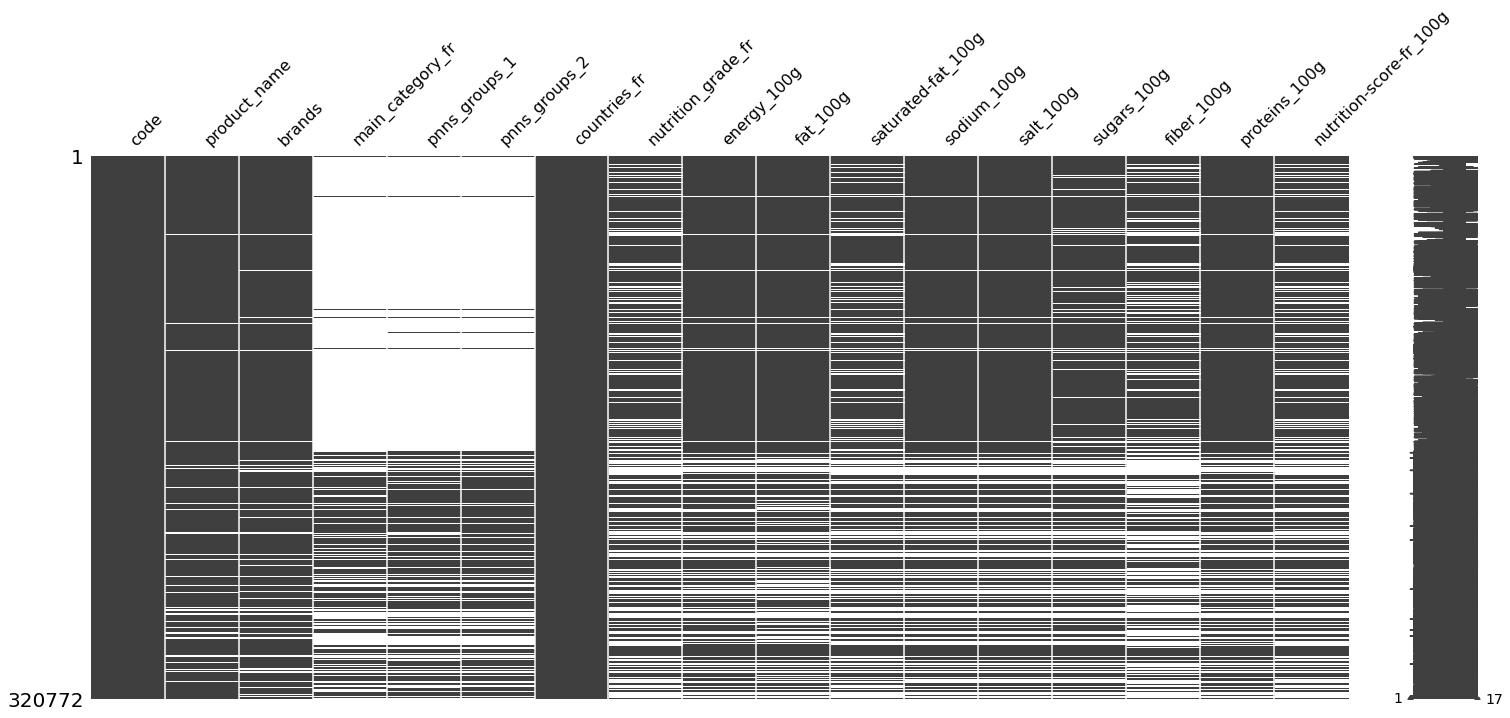

In [18]:
msno.matrix(data_nettoye)

Nous avons actuellement un dataset à hauteur de 320772 lignes et 17 colonnes. Nous pouvons estimer que la sélection concernant les colonnes est désormais cohérente.
Concernant les lignes, nous allons procéder à la suppression des doublons puis nous pourrons nettoyer les lignes ayant aucune valeur nutritionnelle ultérieurement.

### c. Nettoyage par lignes et par sélection

In [19]:
# vérification si doublons
data_nettoye.loc[data_nettoye['code'].duplicated(keep=False),:]


,code,product_name,brands,main_category_fr,pnns_groups_1,pnns_groups_2,countries_fr,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,sodium_100g,salt_100g,sugars_100g,fiber_100g,proteins_100g,nutrition-score-fr_100g
6,16117,Organic Long Grain White Rice,Lundberg,NaN,NaN,NaN,États-Unis,NaN,1490.0,NaN,NaN,NaN,NaN,NaN,NaN,8.890,NaN
46,24600,Filet de bœuf,NaN,Filet-de-boeuf,unknown,unknown,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,31233,35% Fruit And Fiber Muesli,Golden Temple,NaN,NaN,NaN,États-Unis,NaN,1523.0,4.55,NaN,0.073000,0.18542,23.64,9.10,10.910,NaN
155,58001,Organic Salted Pistachios,Unfi,NaN,NaN,NaN,États-Unis,d,2540.0,46.43,5.36,0.571000,1.45034,10.71,10.70,21.430,15.0
194,20004552,Côte du Rhône village,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,20048402,Freshly Baked Chocolat Croissant,Fresh & Easy,NaN,NaN,NaN,États-Unis,e,1812.0,23.33,13.33,0.417000,1.05918,11.67,1.70,8.330,19.0
215,20048556,Cornbread,Fresh & Easy,NaN,NaN,NaN,États-Unis,d,1632.0,18.64,3.39,0.322000,0.81788,22.03,1.70,6.780,12.0
230,54491472,Coca Cola,NaN,NaN,NaN,NaN,Royaume-Uni,NaN,180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,54491496,Diet Coke,NaN,NaN,unknown,unknown,Royaume-Uni,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,80007838,Acqua oligominerale San benedetto frizzante,NaN,NaN,NaN,NaN,Italie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# 2 variables avec exactement les mêmes données : nous allons effectuer la suppression d'une ligne
data_nettoye.drop_duplicates('code', keep='first', inplace = True)

<AxesSubplot:>

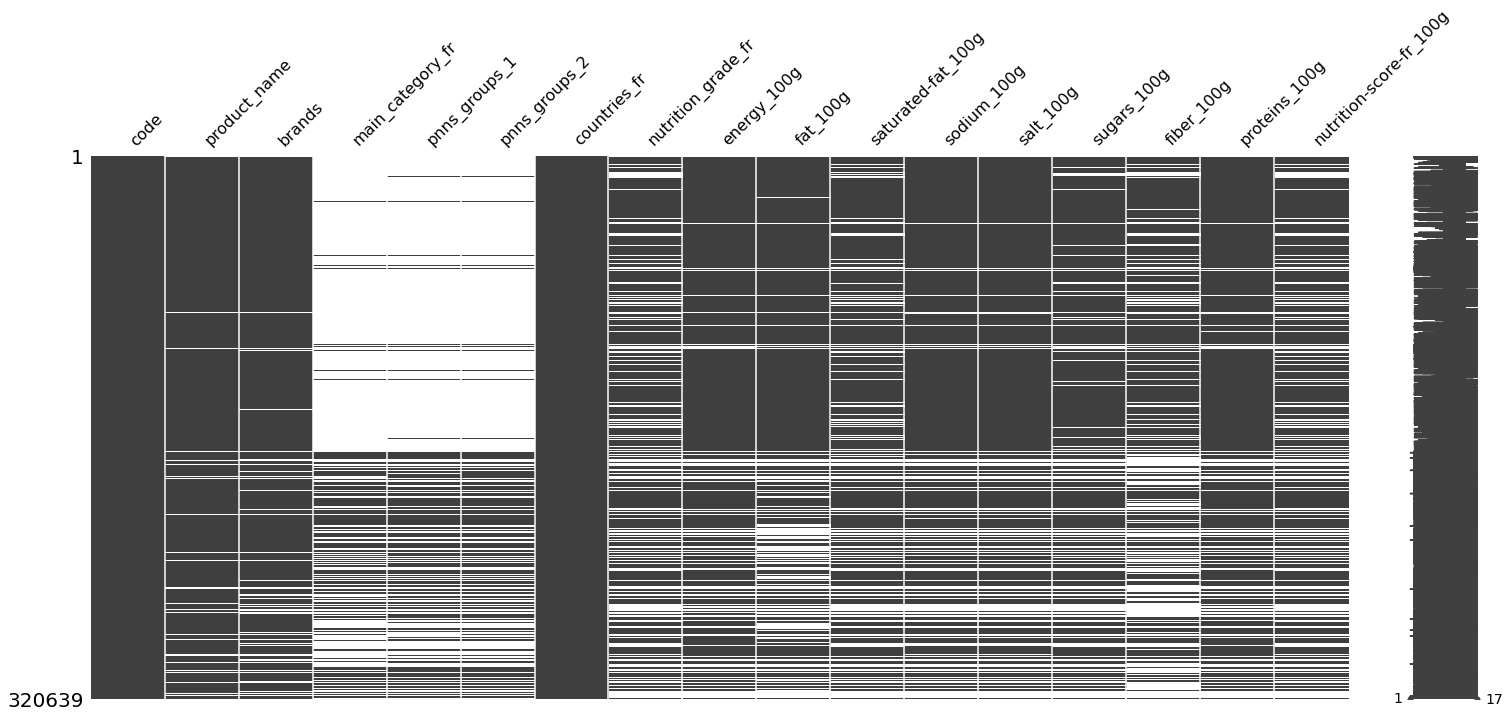

In [21]:
msno.matrix(data_nettoye)

In [22]:
data_nettoye.isnull().mean()*100

code                        0.000312
product_name                5.537692
brands                      8.849204
main_category_fr           73.692845
pnns_groups_1              71.463858
pnns_groups_2              70.535400
countries_fr                0.087326
nutrition_grade_fr         31.029288
energy_100g                18.591001
fat_100g                   23.963398
saturated-fat_100g         28.428544
sodium_100g                20.354979
salt_100g                  20.340320
sugars_100g                23.622828
fiber_100g                 37.369129
proteins_100g              18.967125
nutrition-score-fr_100g    31.029288
dtype: float64

Quand nous analysons cette partie du nettoyage, nous avons principalement sélectionné les colonnes et les lignes nous permettant d'effectuer notre analyse.

Nous constatons que les données alimentaires présentent un écart que l'on va corriger à travers une imputation des données.
Concernant 4 variables catégories, nous allons travailler sur la colonne countries afin de supprimer les lignes vides.



In [23]:
print(data_nettoye['main_category_fr'].value_counts())
print(data_nettoye['pnns_groups_1'].value_counts())
print(data_nettoye['pnns_groups_2'].value_counts())

Boissons                                   6053
Epicerie                                   2900
Chocolats                                  2789
Aliments et boissons à base de végétaux    2744
Conserves                                  2519
                                           ... 
Anchoiade                                     1
Creme-de-riz                                  1
Creme-de-sarrasin                             1
en:Crackers-sans-gluten                       1
pl:Szprot                                     1
Name: main_category_fr, Length: 3543, dtype: int64
unknown                    22623
Sugary snacks              12364
Beverages                   9031
Milk and dairy products     8825
Cereals and potatoes        8440
Fish Meat Eggs              8040
Composite foods             6746
Fruits and vegetables       5908
Fat and sauces              5213
Salty snacks                2808
fruits-and-vegetables        987
sugary-snacks                496
cereals-and-potatoes     

In [24]:
# Nous allons clairement supprimer les colonnes main_category et pnns_group2

data_nettoye.drop(columns =['main_category_fr', 'pnns_groups_2'], inplace = True)

In [25]:
#Corrections des catégories sugary-snacks, fruits-and-vegetables, cereals-and-potatoes, salty-snacks

data_nettoye["pnns_groups_1"] = data_nettoye["pnns_groups_1"].str.lower().str.replace('-', ' ')

Nos données indiquent bien un grand nombre de Nan dans une colonne. Nous pourrons procéder à une finalisation du nettoyage de nos données après avoir procédé au traitement des valeurs aberrantes.


### d. Analyse des valeurs aberrantes

energy_100g                   AxesSubplot(0.125,0.772143;0.168478x0.107857)
fat_100g                   AxesSubplot(0.327174,0.772143;0.168478x0.107857)
saturated-fat_100g         AxesSubplot(0.529348,0.772143;0.168478x0.107857)
sodium_100g                AxesSubplot(0.731522,0.772143;0.168478x0.107857)
salt_100g                     AxesSubplot(0.125,0.642714;0.168478x0.107857)
sugars_100g                AxesSubplot(0.327174,0.642714;0.168478x0.107857)
fiber_100g                 AxesSubplot(0.529348,0.642714;0.168478x0.107857)
proteins_100g              AxesSubplot(0.731522,0.642714;0.168478x0.107857)
nutrition-score-fr_100g       AxesSubplot(0.125,0.513286;0.168478x0.107857)
dtype: object

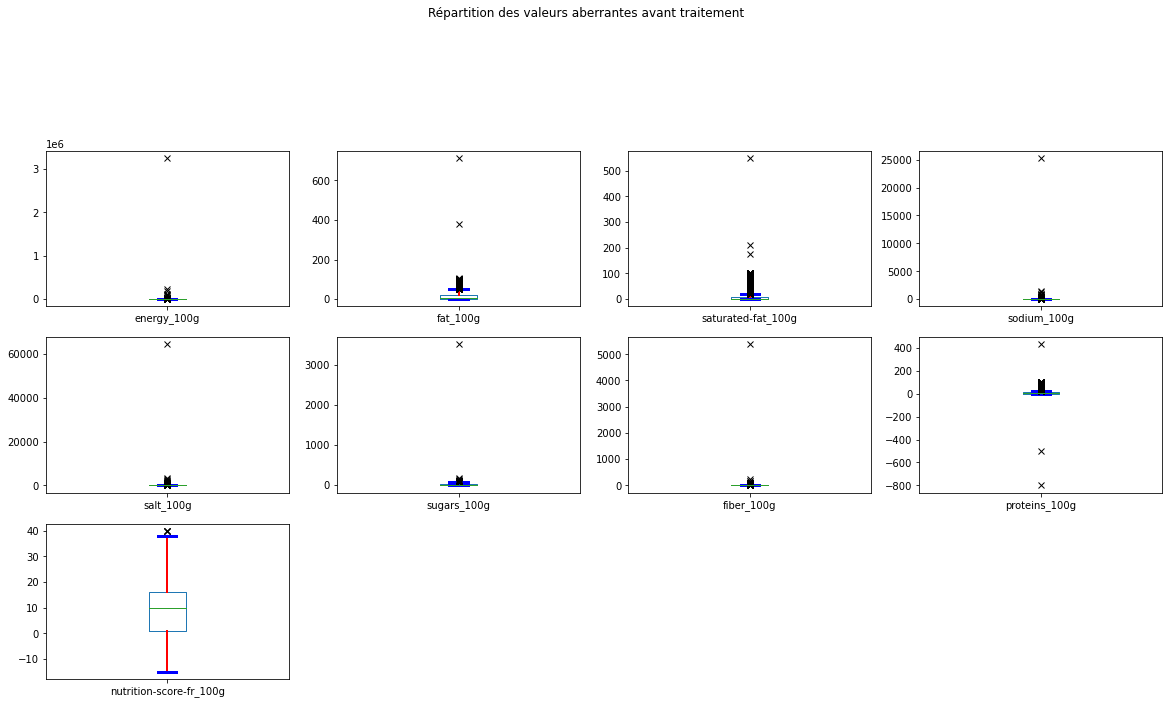

In [26]:
#Visualisation graphique de la distribution de chaque Variable avant le traitement :

data_nettoye.plot(kind="box",subplots=True, sym = 'x',
                                            title = ('Répartition des valeurs aberrantes avant traitement'),
                                            whiskerprops = {'color':'r','linewidth':2,},
                                            capprops={'color': 'blue', 'linewidth': 3,}, 
                                            layout = (6,4), figsize=(20,20))


In [27]:
#Traiter les valeurs aberrantes par la méthode interquartile :
# nutrition et huile de palme ne sont pas inclus en valeurs aberrantes
# nous allons choisir comme donnée la 1.5


for col in data_nettoye.columns:
    if col!="nutrition-score-fr_100g" and col!="ingredients_from_palm_oil_n":
                              
        try:
            q1=data_nettoye[col].quantile(0.25)
            q3=data_nettoye[col].quantile(0.75)
            EI=q3-q1 
            maximum=q3+1.5*EI 
            minimum=q1-1.5*EI   
            
            
            #Tout point de données inférieur à la limit inférieure 
            #ou supérieur à la limite supérieure est considéré comme une valeur aberrante
            #supprimer les valeurs négatives si elles existaient
            data_nettoye[col] = data_nettoye[col].apply(lambda x: maximum if x > maximum else x)
            data_nettoye[col] = data_nettoye[col].apply(lambda x: minimum if x < minimum else x)
            data_nettoye[col] = data_nettoye[col].apply(lambda x: 0 if x < 0  else x)
        except:
            continue   

energy_100g                   AxesSubplot(0.125,0.772143;0.168478x0.107857)
fat_100g                   AxesSubplot(0.327174,0.772143;0.168478x0.107857)
saturated-fat_100g         AxesSubplot(0.529348,0.772143;0.168478x0.107857)
sodium_100g                AxesSubplot(0.731522,0.772143;0.168478x0.107857)
salt_100g                     AxesSubplot(0.125,0.642714;0.168478x0.107857)
sugars_100g                AxesSubplot(0.327174,0.642714;0.168478x0.107857)
fiber_100g                 AxesSubplot(0.529348,0.642714;0.168478x0.107857)
proteins_100g              AxesSubplot(0.731522,0.642714;0.168478x0.107857)
nutrition-score-fr_100g       AxesSubplot(0.125,0.513286;0.168478x0.107857)
dtype: object

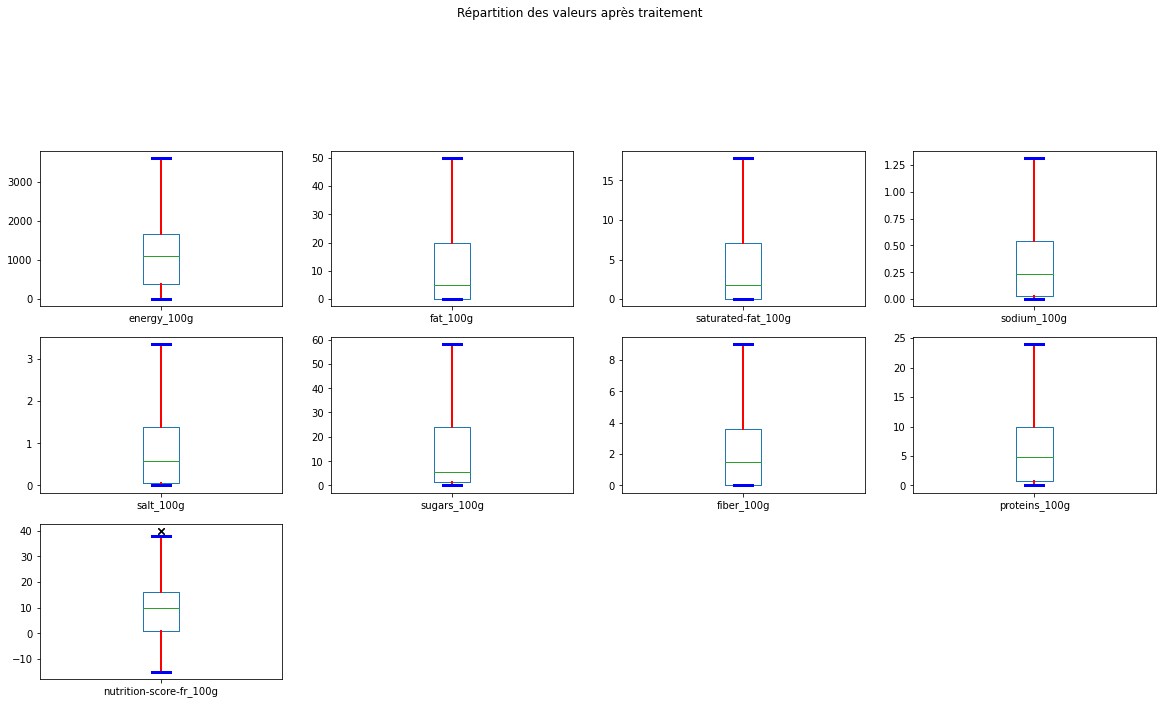

In [28]:
#Visualisation graphique de la distribution de chaque Variable avant le traitement :

data_nettoye.plot(kind="box",subplots=True, sym = 'x',
                                            title = ('Répartition des valeurs après traitement'),
                                            whiskerprops = {'color':'r','linewidth':2,},
                                            capprops={'color': 'blue', 'linewidth': 3,}, 
                                            layout = (6,4), figsize=(20,20))


L'analyse des valeurs aberrantes a bien permis de démontrer la présence de certaines données totalement en décalage.
Nous avons procédé à la méthode interquartile.
Le graphique nous a bien démontré la réussite du traitement des outliers.
L'utilisation de cette méthode est très importante car cela va nous permettre de travailler avec un ensemble de données plus pertinents et nous permettre d'effectuer, par la suite d'autres tâches comme une imputation.

In [29]:
# Analyse du nombre de valeurs nulles avant passage du Knn
data_nettoye.shape

(320639, 15)

Dans l'analyse de notre nettoyage, nous arrivons ici à une étape importante.

Les colonnes présentent me semble les plus pertinentes, nous allons travailler avec ces dernières.
Une grande étape du nettoyage est effectuée.

Afin de procéder à une analyse plus cohérente, nous allons modifier les données présentes dans la colonne pnns_groups_1 afin de regrouper les données à travers des catégories plus précises.

In [30]:
data_nettoye

,code,product_name,brands,pnns_groups_1,countries_fr,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,sodium_100g,salt_100g,sugars_100g,fiber_100g,proteins_100g,nutrition-score-fr_100g
0,3087,Farine de blé noir,Ferme t'y R'nao,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,Banana Chips Sweetened (Whole),NaN,NaN,États-Unis,d,2243.0,28.57,17.85,0.000,0.00000,14.29,3.6,3.57,14.0
2,4559,Peanuts,Torn & Glasser,NaN,États-Unis,b,1941.0,17.86,0.00,0.250,0.63500,17.86,7.1,17.86,0.0
3,16087,Organic Salted Nut Mix,Grizzlies,NaN,États-Unis,d,2540.0,50.00,5.36,0.482,1.22428,3.57,7.1,17.86,12.0
4,16094,Organic Polenta,Bob's Red Mill,NaN,États-Unis,NaN,1552.0,1.43,NaN,NaN,NaN,NaN,5.7,8.57,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,Tomato & ricotta,Panzani,NaN,Roumanie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Trader Joe's,NaN,États-Unis,b,0.0,0.00,0.00,0.000,0.00000,0.00,0.0,0.00,0.0
320769,9970229501521,乐吧泡菜味薯片,乐吧,salty snacks,Chine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,Tomates aux Vermicelles,Knorr,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### e. Nettoyage par regroupements des données

In [31]:
# Modification des valeurs Nan en Divers
categorie = data_nettoye['pnns_groups_1'].replace(np.nan, 'Divers', regex=True)

# Modification des données dans la colonne pour
categorie_final = categorie.replace({'unknown': 'Non défini',
    'sugary snacks': 'sucrés',
               'beverages': 'Boissons et Produits Laitiers',
               'milk and dairy products': 'Boissons et Produits Laitiers',
               'cereals and potatoes': 'Céréales',
               'fish meat eggs': 'Viandes et Poissons',
               'fruits and vegetables': 'Fruits et légumes' ,
               'composite foods': 'Produits transformés',
               'fat and sauces': 'Sauces',
               'salty snacks': 'Produits salés',
              'Divers': 'Divers'}, regex = True)

In [32]:
# Regroupement des deux fichiers
data_clean = pd.merge(data_nettoye, categorie_final, left_index = True, right_index = True)

In [33]:
data_clean

,code,product_name,brands,pnns_groups_1_x,countries_fr,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,sodium_100g,salt_100g,sugars_100g,fiber_100g,proteins_100g,nutrition-score-fr_100g,pnns_groups_1_y
0,3087,Farine de blé noir,Ferme t'y R'nao,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Divers
1,4530,Banana Chips Sweetened (Whole),NaN,NaN,États-Unis,d,2243.0,28.57,17.85,0.000,0.00000,14.29,3.6,3.57,14.0,Divers
2,4559,Peanuts,Torn & Glasser,NaN,États-Unis,b,1941.0,17.86,0.00,0.250,0.63500,17.86,7.1,17.86,0.0,Divers
3,16087,Organic Salted Nut Mix,Grizzlies,NaN,États-Unis,d,2540.0,50.00,5.36,0.482,1.22428,3.57,7.1,17.86,12.0,Divers
4,16094,Organic Polenta,Bob's Red Mill,NaN,États-Unis,NaN,1552.0,1.43,NaN,NaN,NaN,NaN,5.7,8.57,NaN,Divers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,Tomato & ricotta,Panzani,NaN,Roumanie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Divers
320768,99567453,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Trader Joe's,NaN,États-Unis,b,0.0,0.00,0.00,0.000,0.00000,0.00,0.0,0.00,0.0,Divers
320769,9970229501521,乐吧泡菜味薯片,乐吧,salty snacks,Chine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Produits salés
320770,9980282863788,Tomates aux Vermicelles,Knorr,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Divers


In [34]:
# Réorganisation des colonnes
data_clean = data_clean[['code','brands', 'pnns_groups_1_y', 'product_name',
                         'countries_fr','nutrition_grade_fr', 'energy_100g', 'fat_100g',
                         'saturated-fat_100g','sodium_100g', 'salt_100g', 'sugars_100g', 'fiber_100g',
                         'proteins_100g', 'nutrition-score-fr_100g']]

# Renommer les colonnes
data_final = data_clean.rename(columns = {'code': 'Code_Barre',
                             'brands': 'Marque',
                              'pnns_groups_1_y': 'Categorie',
                             'product_name' : 'Nom_produit',
                             'countries_fr' : "Pays",
                             'nutrition_grade_fr' : 'Nutri-score',
                             'energy_100g': 'Energie_100g',
                             'fat_100g': 'Graisse_100g',
                             'saturated-fat_100g': 'Graisse_saturee_100g',
                             'sodium_100g' : 'Sodium_100g',
                             'salt_100g': 'Sel_100g',
                             'sugars_100g': 'Sucre_100g',
                             'fiber_100g': 'Fibre_100g',
                             'proteins_100g': 'Proteine_100g',
                             'nutrition-score-fr_100g': 'Score_Nutri-score'})

Code_Barre               0.000312
Marque                   8.849204
Categorie                0.000000
Nom_produit              5.537692
Pays                     0.087326
Nutri-score             31.029288
Energie_100g            18.591001
Graisse_100g            23.963398
Graisse_saturee_100g    28.428544
Sodium_100g             20.354979
Sel_100g                20.340320
Sucre_100g              23.622828
Fibre_100g              37.369129
Proteine_100g           18.967125
Score_Nutri-score       31.029288
dtype: float64


<AxesSubplot:>

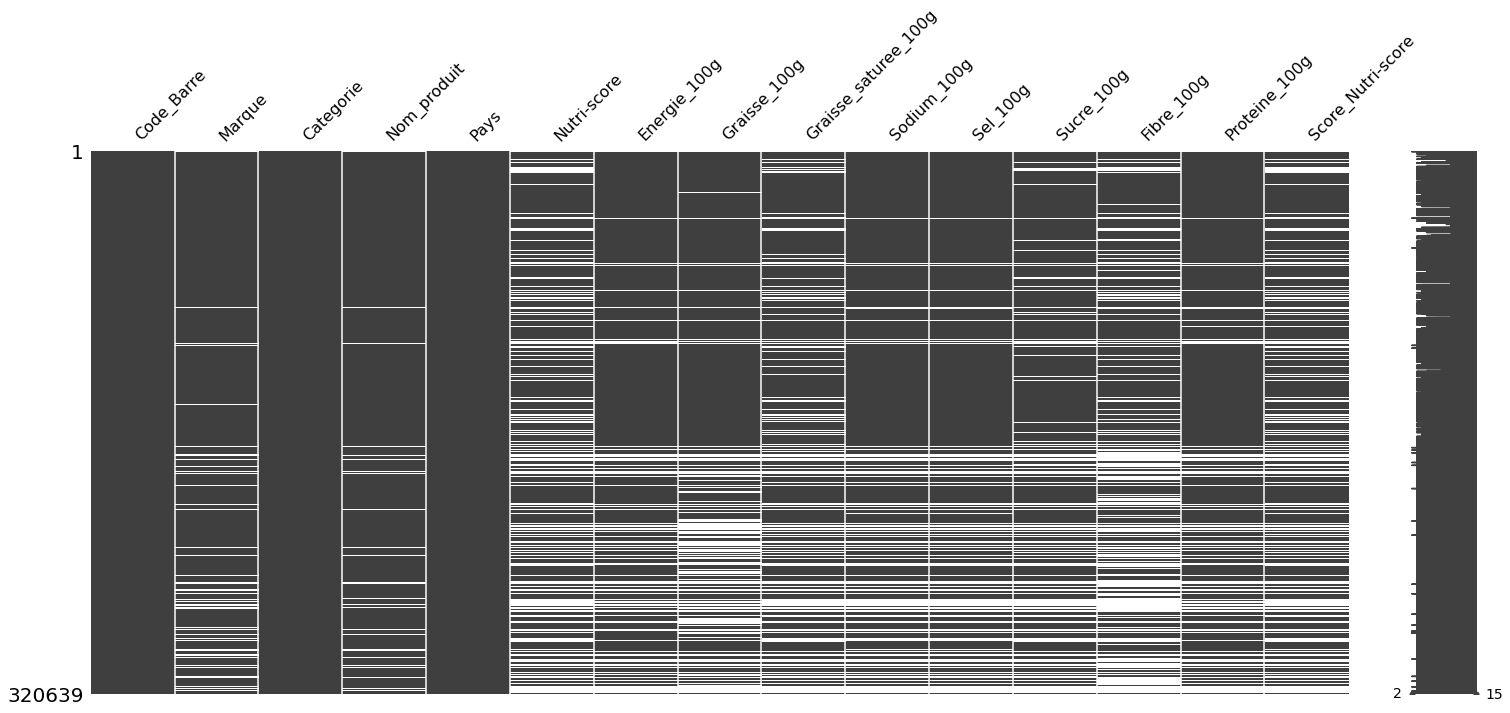

In [35]:
print(data_final.isnull().mean()*100)
msno.matrix(data_final)

Text(0.5, 1.0, 'Représentation des scores')

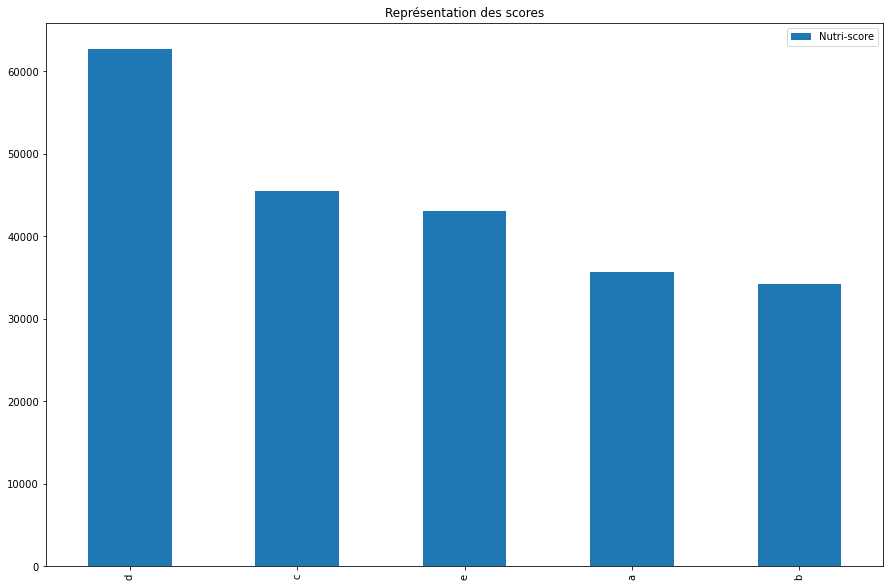

In [36]:
plt.figure(figsize = (15,10))
data_final['Nutri-score'].value_counts().plot(kind = 'bar')
plt.legend()
plt.title('Représentation des scores')


Nous pouvons ici indiquer que la forme de notre fichier est désormais cohérente.
Nous avons nettoyé l'ensemble des colonnes de types objets à savoir ;
- une connaissance plus précise des marques et des produits
- une méthodologie pour traiter les valeurs aberrantes,
- un regroupement des catégories.

Nous allons maintenant procéder à un nettoyage plus abouti des valeurs alimentaires grâce à l'imputation.
En amont, nous allons supprimer toutes les lignes ne présentant aucune valeur nutritionnelle.

### f. Imputation des valeurs manquantes

Afin de procéder à une imputation de l'ensemble de nos valeurs quantitatives.

De nombreuses solutions existent afin de procéder au traitement final de nos valeurs :
- supprimer les lignes avec des valeurs manquantes,
- utiliser la méthode fillna() et y intégrer un nombre précis ou une donnée calculée (moyenne ou médiane par exemple),
- effectuer une imputation des données

Nous allons procéder à la suppression des lignes n'ayant aucune valeur nutritionnelle.

Ensuite, nous pourrons procéder à la mise en place de notre imputation de données.

In [37]:
# Suppression des valeurs sans aucune valeur nutritives

# ensuite, on supprime les lignes avec un trop grand nombre d'années avec valeurs nulles
valeurs = ['Energie_100g','Graisse_100g', 'Graisse_saturee_100g', 'Sodium_100g',
           'Sel_100g', 'Sucre_100g', 'Fibre_100g', 'Proteine_100g']

data_final.dropna(thresh = 1, subset = valeurs, inplace = True)


In [38]:
data_final.groupby('Categorie')['Energie_100g','Graisse_100g', 'Graisse_saturee_100g', 'Sodium_100g',
           'Sel_100g', 'Sucre_100g', 'Fibre_100g', 'Proteine_100g'].mean()

C:\Users\gregm\AppData\Local\Temp/ipykernel_1076/561665256.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_final.groupby('Categorie')['Energie_100g','Graisse_100g', 'Graisse_saturee_100g', 'Sodium_100g',


,Energie_100g,Graisse_100g,Graisse_saturee_100g,Sodium_100g,Sel_100g,Sucre_100g,Fibre_100g,Proteine_100g
Categorie,,,,,,,,
Boissons et Produits Laitiers,563.927121,8.395550,4.864501,0.153284,0.389283,9.071462,0.428978,5.442262
Céréales,1356.488711,5.994222,1.708276,0.245405,0.623322,6.781026,4.683526,9.972801
Divers,1134.254617,11.599306,4.532300,0.362351,0.920185,15.822596,2.396297,6.593833
Fruits et légumes,397.707643,2.312012,0.574550,0.173684,0.441081,10.263942,2.727641,2.291720
Non défini,1131.460835,12.572513,4.540412,0.359340,0.912497,13.188675,2.693874,6.987237
Produits salés,2119.010329,29.927905,5.267469,0.575091,1.460741,4.742080,4.533044,10.222922
Produits transformés,689.705724,7.534457,2.540210,0.408668,1.038021,2.425615,2.095253,7.536446
Sauces,1606.814053,26.872553,6.477391,0.537732,1.365838,5.770359,1.010220,1.851313
Viandes et Poissons,864.435684,13.625601,4.473714,0.696715,1.769335,0.878560,0.530520,17.970480


Nous avons procédé au nettoyage des valeurs nutritionnels. Notre orientation est de conserver à minima une ligne ayant au moins 1 valeur qui pourra être nécessaire à notre analyse.

#### Iterative Imputer

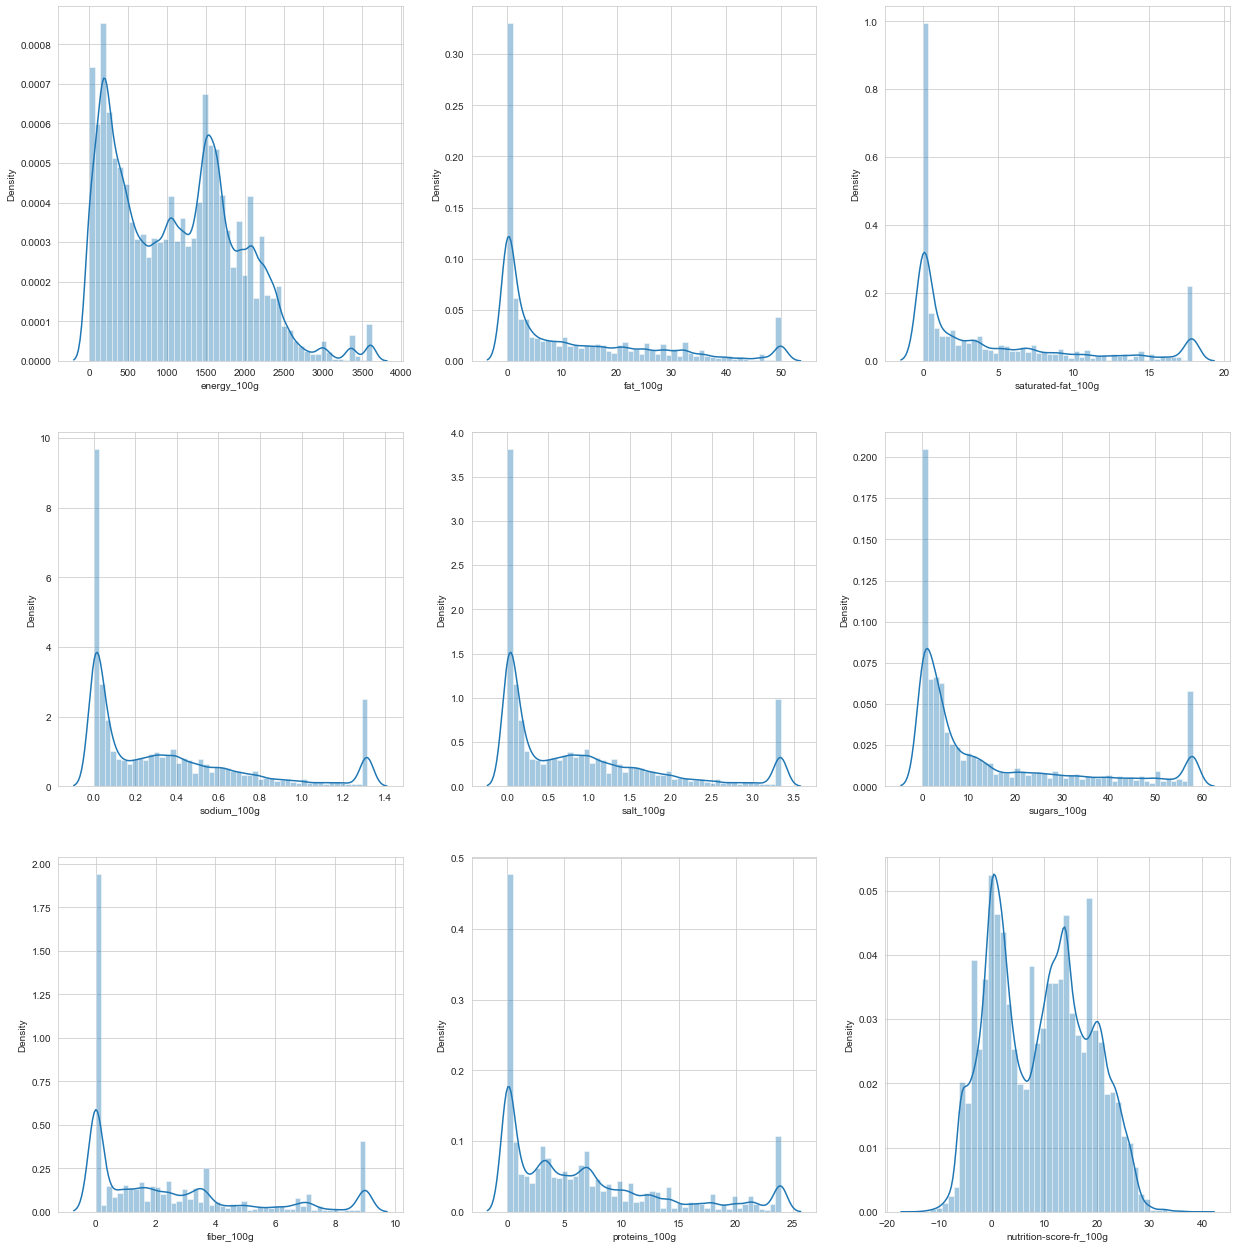

In [39]:
#Analyse des données avant imputation

warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
fig = plt.figure(figsize=(21,30))
numerical_cols = list(data_nettoye.select_dtypes(include=["float64","int64"]).columns)
sub = 0
for i in range(len(numerical_cols)):
    fig.add_subplot(4,3,i+1)
    
    left, width = 0, 1
    bottom, height = 0, 1
    right = left + width
    top = bottom + height
    
    colonne = numerical_cols[i]
    ax = sns.distplot(data_nettoye[colonne], kde=True)
plt.show()

Parmi les colonnes que nous avons sélectionné, nous pouvons remarquer que certaines ont un lien concernant la valeur nutritionnelle comme le sel et le sodium mais également la graisse et graisse saturée.

Dans le cadre de notre imputation, nous allons surtout procéder à une imputation à travers la méthode du Iterative Imputer. Nous allons procéder à cette imputation de manière cohérente en fonction du lien existant entre les nutriments.

L'objectif de ce traitement sera de conserver un maximum de données sans biaisés nos variables.

<AxesSubplot:>

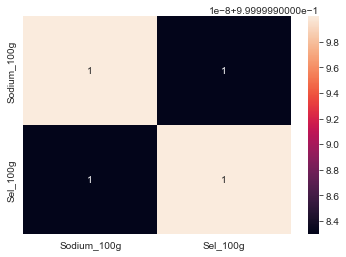

In [46]:
# 1. On effectue l'imputation de nos données 

sel_sodium = data_final[['Sodium_100g', 'Sel_100g']]
graisse = data_final[['Graisse_100g', 'Graisse_saturee_100g']]
autres = data_final[['Energie_100g', 'Sucre_100g', 'Fibre_100g', 'Proteine_100g', 'Score_Nutri-score']]

imp = IterativeImputer()

encodage1 = imp.fit_transform(sel_sodium)
encodage2 = imp.fit_transform(graisse)
encodage3 = imp.fit_transform(autres)

# 2. On crée les différents DataFrame
df = pd.DataFrame(encodage1, columns = ['Sodium_100g', 'Sel_100g'])
df2 = pd.DataFrame(encodage2, columns = ['Graisse_100g', 'Graisse_saturee_100g'])
df3 = pd.DataFrame(encodage3, columns = ['Energie_100g', 'Sucre_100g', 'Fibre_100g', 'Proteine_100g', 'Score_Nutri-score'])


# 3.On reprend nos variables objets
df1=data_final.loc[:,["Code_Barre","Marque","Nom_produit",'Categorie', "Pays", 'Nutri-score']]


On va concaténer tous nos fichiers
df1.reset_index(inplace=True, drop=True)
data1 = pd.concat([df1, df, df2, df3], axis = 1)


In [56]:
# Réorganisation du DataFrame
data_final = data1[["Code_Barre","Marque","Nom_produit",'Categorie', "Pays", 'Nutri-score',
                    'Energie_100g','Graisse_100g', 'Graisse_saturee_100g', 'Sodium_100g',
                    'Sel_100g', 'Sucre_100g', 'Fibre_100g', 'Proteine_100g', 'Score_Nutri-score']]

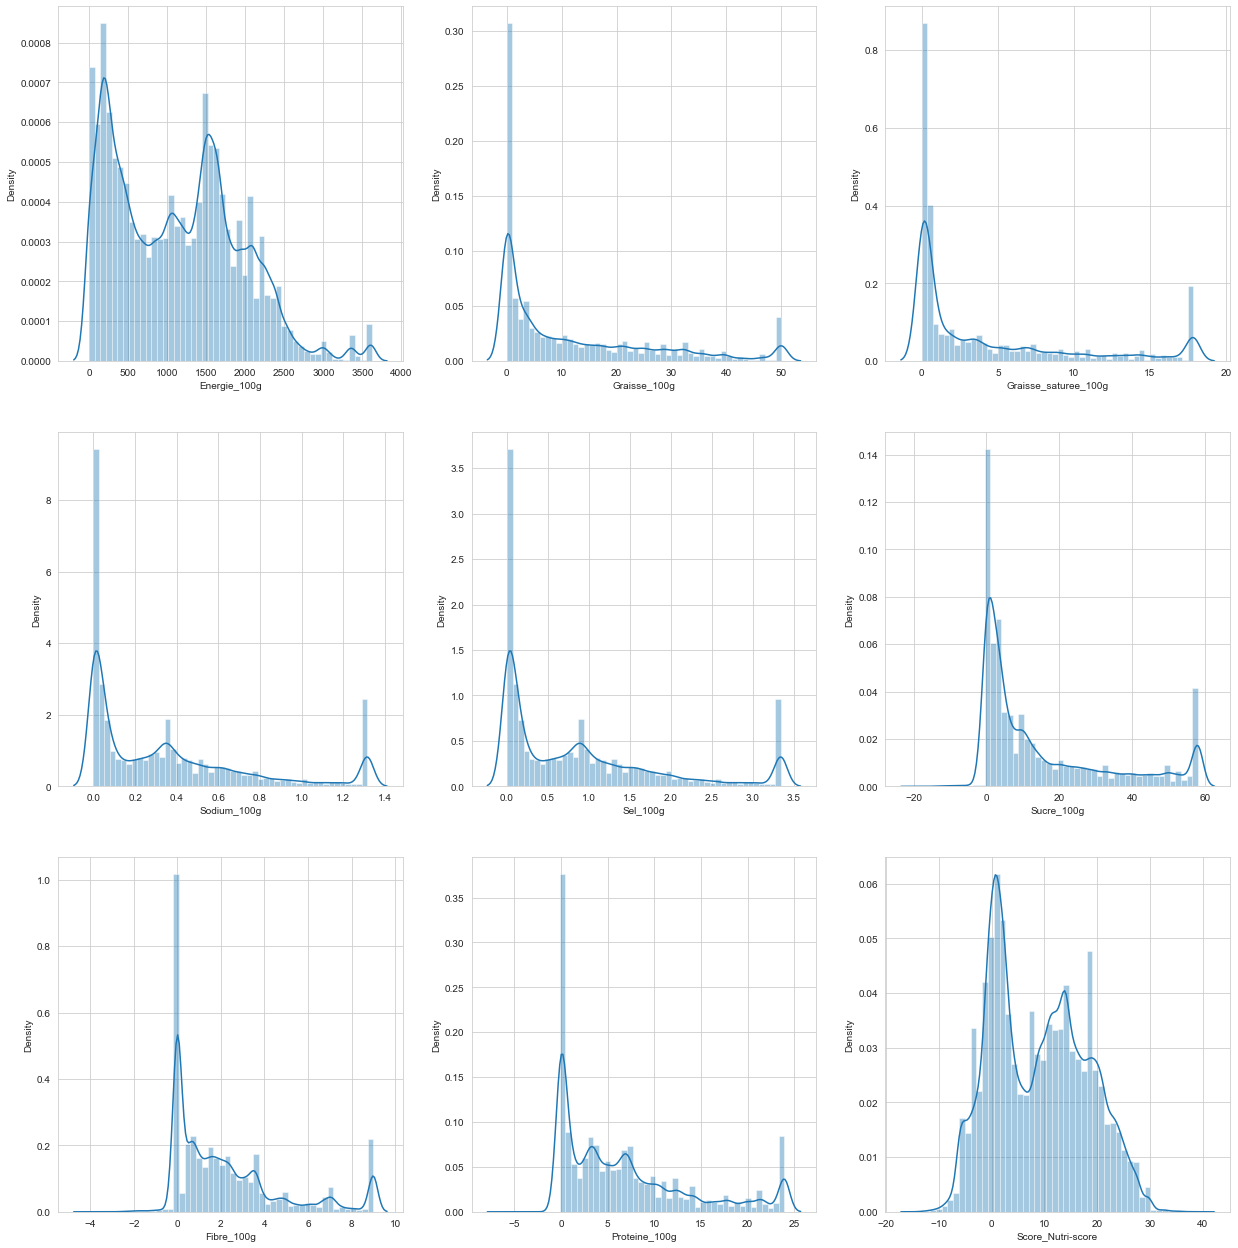

In [58]:
#Analyse des données après imputation

warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
fig = plt.figure(figsize=(21,30))
numerical_cols = list(data_final.select_dtypes(include=["float64","int64"]).columns)
sub = 0
for i in range(len(numerical_cols)):
    fig.add_subplot(4,3,i+1)
    
    left, width = 0, 1
    bottom, height = 0, 1
    right = left + width
    top = bottom + height
    
    colonne = numerical_cols[i]
    ax = sns.distplot(data_final[colonne], kde=True)
plt.show()

<AxesSubplot:>

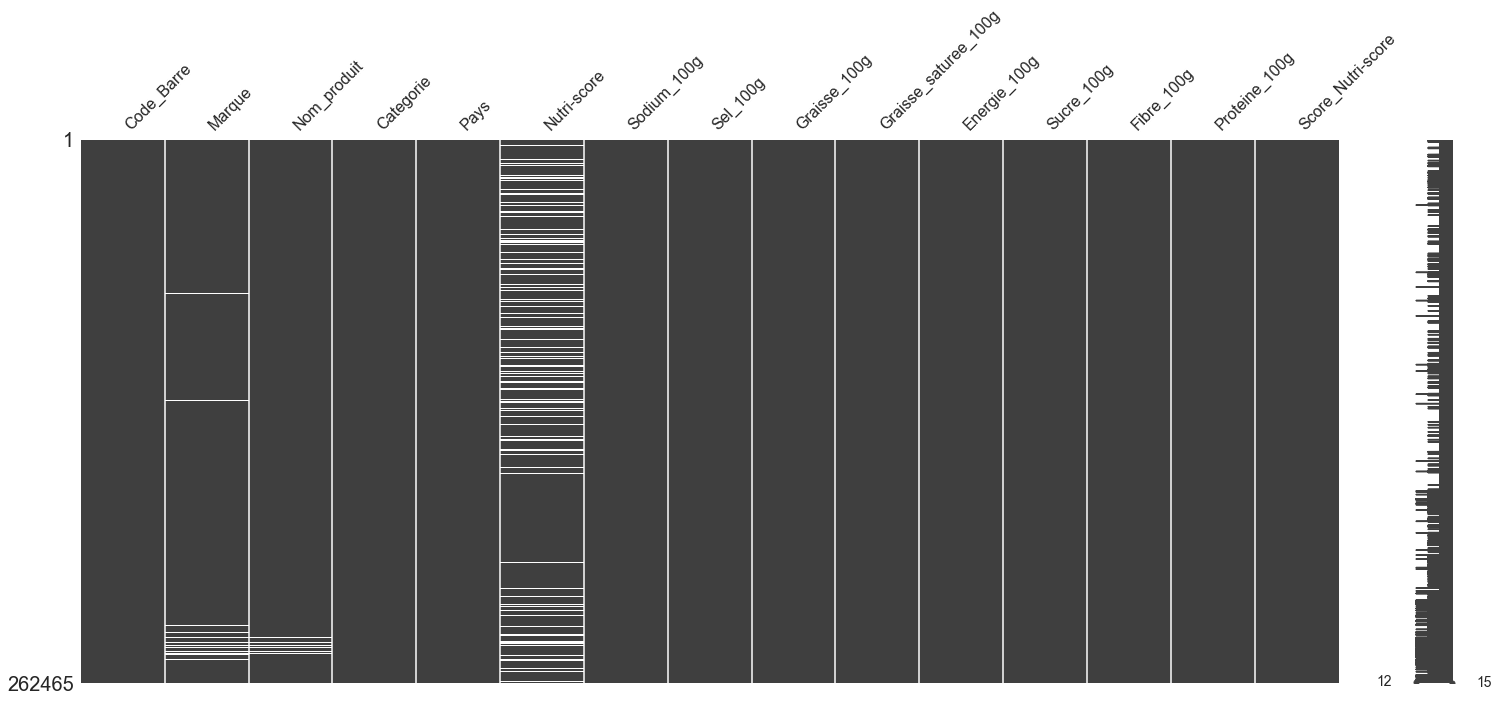

In [55]:
# Résultat du nettoyage après imputation

msno.matrix(data1)

In [109]:
# Calcul du taux d'évolution de notre fichier

print(data_final.shape)
print("Le taux d'évolution de notre fichier est de :",((len(data_final) - len(data)) / len(data))*100, '%')

(262465, 15)
Le taux d'évolution de notre fichier est de : -18.17708528175776 %


Nous pouvons ici constater que notre méthode a parfaitement fonctionné.
En effet, l'ensemble des cellules sont remplies dans leur globalité et nous a permis de conserver des données viables pour notre étude.
L'analyse des données avant et après le nettoyage a notamment permis de confirmer notre méthodologie de travail pour le nettoyage des données

# 

Nous pouvons ici conclure pour cette première partie que notre analyse a parfaitement répondu à notre attente.

L'analyse de notre fichier nous a indiqué un dataframe avec 320772 lignes et 162 colonnes pour arriver à un final de 262465 lignes et 14 colonnes soit une baisse de 18%.



Pour le nettoyage, nous avons utilisé plusieurs méthodes afin de répondre à notre attente, à savoir :
- nettoyage en fonction d'un taux d'absences de valeurs par les colonnes,
- nettoyage en éliminant des colonnes peu utiles pour notre analyse 
- suppression des lignes avec mise à jour des données mais aussi la suppression des différents doublons,
- traitement et répartition des données manquantes dans la colonne de catégorie des produits,
- traitement des valeurs aberrantes à travers la méthode de l'interquartile,
- imputation des données à l'aide de l'ImperativeImputer.

Bien entendu, de nombreuses autres méthodes existent pour effectuer un nettoyage des valeurs manquantes.
Toutefois, j'estime que la méthodologie utilisée peut nous permettre de répondre à la problématique de notre application.


Nous avons pris l'orientation de ne pas corriger en totalité les colonnes 'Marque', 'Nom du produit' et 'Pays d'origine' afin de ne pas fausser notre analyse exploratoire.
Il faut toutefois indiquer que ces dernières sont conservées pour une analyse plus complète dans notre seconde partie mais dans le cadre d'une modélisation, ces colonnes seront supprimées.


In [59]:
#Exportation de jeu de données nettoyées

data_final.to_csv("data_clean_final.csv",header=True,index=False)

# 